**Machine overall equipment effectiveness analysis -individual unit of the machine**


**Overall Equipment Effectiveness<br>**
The manufacturing productivity can be measured by using the Overall Equipment Effectiveness as it is standard metric to measure comparing “how well manufacturing equipment is running compared to the ideal plant?”. This term was first introduced in 1982 by the Japanese scientist Seiichi Nakajima. 100% of an OEE score describes, the producer is manufacturing only high-quality Parts, as fast as possible, with no downtimes. “In the language of OEE that means 100% Quality (only Good Parts), 100% Performance (as fast as possible), and 100% Availability (no Stop Time)”. Similarly, measuring OEE is a best practice of industries. As a result of measuring OEE and the underlying losses, the manufacturer will gain significant insights on manufacturing process, as how to improve it in systematically way. It is most single
best metric in many ways such as identifying losses, benchmarking progress, and improving the productivity of manufacturing equipment . OEE is calculated by multiplying three independently measured values, which are Availability Rate, Performance Rate, and Quality Rate. The fundamental OEE definition is defined as following formula.


**OEE=A×P×Q<br>**
Where A represents the availability of the machine, P is performance and Q is quality. They are calculated as,<br>
A=Operating Time ÷ Planned Production Time<br>
P=Total Pieces ÷ (Operating Time  ×Ideal Run Rate)<br>
Q=Good Pieces  ÷ Total Pieces<br>


In [2]:
import pandas as pd
import json
import bson
import matplotlib.pyplot as plt

In [3]:
import pymongo
from pymongo import MongoClient
client=MongoClient('localhost' ,27017)

df = pd.read_csv('topic_Egg sampler.csv')

In [4]:
#Import multiple CSV files into pandas and concatenate into one DataFrame
import os
import glob
path = "C:/Users/HLQ/Documents/jupyter/EGSS/OEE Egg production_Actual_2022_0726_1013/Egg sampler data/DB csv"
allFiles = glob.glob(os.path.join(path,"*.csv"))


dataframes_list_1 = []
for file_ in allFiles:
    df3 = pd.read_csv(file_,index_col=0)

    dataframes_list_1.append(df3)

In [5]:
dataframes_list_1[7].head()

,_id,topic,oldMode,newMode,oldState,newState,oldModeName,newModeName,oldStateName,newStateName,changeTime,durationHr,modeChangeTime,oldname,newname,oldstate,newstate,stateChangeTime,date,time
0,61a8d64794cd171694a5f098,brix/PackML/Egg sampler/Product Lifter,1.0,1.0,2.0,15.0,Production,Production,Stopped,Resetting,2021-12-02T14:19:40.809Z,0.026511,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02,14:19:40.809Z
1,61a8d64894cd171694a5f191,brix/PackML/Egg sampler/Product Lifter,1.0,1.0,15.0,4.0,Production,Production,Resetting,Idle,2021-12-02T14:19:41.409Z,0.000167,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02,14:19:41.409Z
2,61a8d69d94cd171694a5f4eb,brix/PackML/Egg sampler/Product Lifter,1.0,1.0,4.0,3.0,Production,Production,Idle,Starting,2021-12-02T14:21:06.517Z,0.023642,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02,14:21:06.517Z
3,61a8d69d94cd171694a5f561,brix/PackML/Egg sampler/Product Lifter,1.0,1.0,3.0,6.0,Production,Production,Starting,Execute,2021-12-02T14:21:06.557Z,0.000011,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02,14:21:06.557Z
4,61a8d69d94cd171694a5f563,brix/PackML/Egg sampler/Product Lifter,1.0,1.0,6.0,3.0,Production,Production,Execute,Starting,2021-12-02T14:21:06.577Z,0.000006,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-02,14:21:06.577Z


In [6]:
brix1packml = dataframes_list_1[1]
brix1packml.head()
#brix1packml.info()

,_id,topic,oldMode,newMode,oldState,newState,oldModeName,newModeName,oldStateName,newStateName,changeTime,durationHr,date,time
0,620b60de32d6c511bc657f43,brix/PackML/Egg sampler/Tray transfer,1,3,2,2,Production,Manual,Stopped,Stopped,2022-02-15T08:16:08.834Z,15.975603,2022-02-15,08:16:08.834Z
1,620b614a32d6c511bc65842c,brix/PackML/Egg sampler/Tray transfer,1,3,2,2,Production,Manual,Stopped,Stopped,2022-02-15T08:17:57.338Z,0.012988,2022-02-15,08:17:57.338Z
2,620b64ecee0f66110041e8fe,brix/PackML/Egg sampler/Tray transfer,1,3,2,2,Production,Manual,Stopped,Stopped,2022-02-15T08:33:27.945Z,0.211131,2022-02-15,08:33:27.945Z
3,620b659cee0f66110041f092,brix/PackML/Egg sampler/Tray transfer,1,3,2,2,Production,Manual,Stopped,Stopped,2022-02-15T08:36:24.175Z,0.029449,2022-02-15,08:36:24.175Z
4,620b7601ee0f6611004237ac,brix/PackML/Egg sampler/Tray transfer,1,3,2,2,Production,Manual,Stopped,Stopped,2022-02-15T09:46:20.290Z,0.054000,2022-02-15,09:46:20.290Z


In [8]:
brix1packml["oldStateName"].value_counts()

Stopped      7346
Execute      7283
Starting     6972
Idle         4254
Resetting    4144
Aborted      3287
Stopping     2995
Aborting     2740
Clearing     2538
Held          977
Holding       931
Unholding     464
Name: oldStateName, dtype: int64

In [9]:
#filter production mode

dataframes_list_production_mode=[]
for brix1packml_df in dataframes_list_1:
    
    filter_pro= brix1packml_df["oldModeName"]=="Production"
    # printing only filtered columns
    filter_Productionmode=brix1packml_df.where(filter_pro).dropna()
    dataframes_list_production_mode.append(filter_Productionmode)

In [10]:
dataframes_list_production_mode[0].head()

,_id,topic,oldMode,newMode,oldState,newState,oldModeName,newModeName,oldStateName,newStateName,changeTime,durationHr,date,time
0,620b60de32d6c511bc657ddd,brix/PackML/Egg sampler/Tray supplier,1.0,3.0,2.0,2.0,Production,Manual,Stopped,Stopped,2022-02-15T08:16:08.834Z,15.975620,2022-02-15,08:16:08.834Z
1,620b614a32d6c511bc6582c6,brix/PackML/Egg sampler/Tray supplier,1.0,3.0,2.0,2.0,Production,Manual,Stopped,Stopped,2022-02-15T08:17:57.338Z,0.013004,2022-02-15,08:17:57.338Z
2,620b64ecee0f66110041e798,brix/PackML/Egg sampler/Tray supplier,1.0,3.0,2.0,2.0,Production,Manual,Stopped,Stopped,2022-02-15T08:33:27.945Z,0.211148,2022-02-15,08:33:27.945Z
3,620b659cee0f66110041ef30,brix/PackML/Egg sampler/Tray supplier,1.0,3.0,2.0,2.0,Production,Manual,Stopped,Stopped,2022-02-15T08:36:24.175Z,0.029466,2022-02-15,08:36:24.175Z
4,620b7601ee0f661100423648,brix/PackML/Egg sampler/Tray supplier,1.0,3.0,2.0,2.0,Production,Manual,Stopped,Stopped,2022-02-15T09:46:20.290Z,0.054016,2022-02-15,09:46:20.290Z


##OEE -overall equipment effectiveness calculation

According to Packaging Machine Language (PackML) State Model

Execute      
Starting     
Stopped      
Resetting    
Aborted     
Idle         
Aborting     
Stopping     
Clearing     
Held          
Holding       
Unholding

***Availability***<br>
**Availablity = T𝑖𝑚𝑒 𝑚𝑎𝑐ℎ𝑖𝑛𝑒 𝑖𝑠 𝑃𝑟𝑜𝑑𝑢𝑐𝑖𝑛𝑔 𝑃𝑟𝑜𝑑𝑢𝑐𝑡 (𝐸𝑥𝑒𝑐𝑢𝑡𝑒 + 𝐻𝑜𝑙𝑑𝑖𝑛𝑔 + 𝑆𝑢𝑠𝑝𝑒𝑛𝑑𝑖𝑛𝑔) /(T𝑖𝑚𝑒 𝑚𝑎𝑐ℎ𝑖𝑛𝑒 𝑖𝑠 𝑃𝑟𝑜𝑑𝑢𝑐𝑖𝑛𝑔 𝑃𝑟𝑜𝑑𝑢𝑐𝑡 + 𝑇𝑖𝑚𝑒     𝑤ℎ𝑒𝑛 𝑚𝑎𝑐ℎ𝑖𝑛𝑒 𝑖𝑠 𝑖𝑛 𝑓𝑎𝑙𝑖𝑢𝑟𝑒(𝐻𝑒𝑙𝑑+𝑆𝑡𝑜𝑝𝑝𝑒𝑑+𝐴𝑏𝑜𝑟𝑡𝑒𝑑))**

Availability is a percentage of the time the equipment/line  spent producing products (in the PackML Execute State, Suspending State and Holding State) 

**Performance**<br>
**Performance= Total quantity produced at this machine/(𝑇𝑖𝑚𝑒 𝑚𝑎𝑐ℎ𝑖𝑛𝑒 𝑖𝑠 𝑝𝑟𝑜𝑑𝑢𝑐𝑖𝑛𝑔 𝑃𝑟𝑜𝑑𝑢𝑐𝑡 (𝐸𝑥𝑒𝑐𝑢𝑡𝑒) ∗ 𝑀𝑎𝑥𝑖𝑚𝑢𝑚 𝑀𝑎𝑐ℎ𝑖𝑛𝑒 𝑆𝑝𝑒𝑒d)**




In [11]:
dataframes_list1=[]
for brix1packml in dataframes_list_production_mode:
    #Availability
    #filter [newStateName']=="Execute") or ['newStateName']=="Holding"
    #time_machine_producing_product
    a=(brix1packml['oldStateName']=="Execute") | (brix1packml['oldStateName']=="Holding")
    Execute_Holding_df=brix1packml[a]
    
    #time_machine_faliure
    # filter 'newStateName']=="Held" or  "Stopped" or "Aborted"
    a1=(brix1packml['oldStateName']=="Held") | (brix1packml['oldStateName']=="Stopped") | (brix1packml['oldStateName']=="Aborted")
    Held_Stopped_Aborted_df=brix1packml[a1]

    #Performance
    E=(brix1packml['oldStateName']=="Execute")
    Execute_df=brix1packml[E]
    
    H=(brix1packml['oldStateName']=="Holding")
    Holding_df=brix1packml[H]

    He=(brix1packml['oldStateName']=="Held")
    Held_df=brix1packml[He]

    S=(brix1packml['oldStateName']=="Stopped")
    Stopped_df=brix1packml[S]

    Ab=(brix1packml['oldStateName']=="Aborted")
    Aborted_df=brix1packml[Ab]
    
    Holding_df['date'] = pd.to_datetime(Holding_df['date'])
    delily_summary_time_machine_producing_product_Holding = Holding_df.resample('d', on='date').sum()
    delily_summary_time_machine_producing_product_Holding1=delily_summary_time_machine_producing_product_Holding.rename({'durationHr':'HoldingHr'}, axis=1)
    
    Held_df['date'] = pd.to_datetime(Held_df['date'])
    delily_summary_time_machine_producing_product_Held = Held_df.resample('d', on='date').sum()
    delily_summary_time_machine_producing_product_Held1=delily_summary_time_machine_producing_product_Held.rename({'durationHr':'HeldHr'}, axis=1)
   
    Stopped_df['date'] = pd.to_datetime(Stopped_df['date'])
    delily_summary_time_machine_producing_product_Stopped= Stopped_df.resample('d', on='date').sum()
    delily_summary_time_machine_producing_product_Stopped1=delily_summary_time_machine_producing_product_Stopped.rename({'durationHr':'StoppedHr'}, axis=1)
    
    Aborted_df['date'] = pd.to_datetime(Aborted_df['date'])
    delily_summary_time_machine_producing_product_Aborted = Aborted_df.resample('d', on='date').sum()
    delily_summary_time_machine_producing_product_Aborted1=delily_summary_time_machine_producing_product_Aborted.rename({'durationHr':'AbortedHr'}, axis=1)
    
    #delily_summary_time_machine_producing_product_Execute
    Execute_df['date'] = pd.to_datetime(Execute_df['date'])
    delily_summary_time_machine_producing_product_Execute = Execute_df.resample('d', on='date').sum()
    
    #rename 'durationHr':'ExecuteHr'
    delily_summary_time_machine_producing_product_Execute1=delily_summary_time_machine_producing_product_Execute.rename({'durationHr':'ExecuteHr'}, axis=1)
    
    #delily_summary_time_machine_producing_product
    Execute_Holding_df['date'] = pd.to_datetime(Execute_Holding_df['date'])
    delily_summary_time_machine_producing_product = Execute_Holding_df.resample('d', on='date').sum()
    delily_summary_time_machine_producing_product1=delily_summary_time_machine_producing_product.rename({'durationHr':'P_productHr'}, axis=1)
    
    #delily_time_machine_faliure
    Held_Stopped_Aborted_df['date'] = pd.to_datetime(Held_Stopped_Aborted_df['date'])
    delily_time_machine_faliure = Held_Stopped_Aborted_df.resample('d', on='date').sum()
    
    #rename durationHr
    delily_time_machine_faliure1=delily_time_machine_faliure.rename({'durationHr':'faliureHr'}, axis=1)

    # new for add packml state
    extracted_col11 = delily_summary_time_machine_producing_product_Holding1["HoldingHr"]
    Availability_data1 = delily_summary_time_machine_producing_product_Held1.join(extracted_col11)

    extracted_col12 =delily_summary_time_machine_producing_product_Stopped1["StoppedHr"]
    Availability_data2 = Availability_data1.join(extracted_col12)

    extracted_col13 =delily_summary_time_machine_producing_product_Aborted1["AbortedHr"]
    Availability_data3 = Availability_data2.join(extracted_col13)

    extracted_col14 = delily_summary_time_machine_producing_product_Execute1["ExecuteHr"]
    Availability_data4 = Availability_data3.join(extracted_col14)

    extracted_col15 = delily_time_machine_faliure1["faliureHr"]
    Availability_data5 = Availability_data4.join(extracted_col15)

    extracted_col16 = delily_summary_time_machine_producing_product1["P_productHr"]
    Availability_Performance_data = Availability_data5.join(extracted_col16)
    Availability_Performance_data.head()
    
    #add Availability_data 
    #extracted_col = delily_time_machine_faliure1["faliureHr"]
    #Availability_data = delily_summary_time_machine_producing_product1.join(extracted_col)
    
    #add Performance_data
    #extracted_col1 = delily_summary_time_machine_producing_product_Execute1["E_productHr"]
    #Availability_Performance_data = Availability_data.join(extracted_col1)
    
    Availability_Performance_data = Availability_Performance_data.reset_index()
    
    # calculate and add Availability 
    Availability_Performance_data['Availability']=Availability_Performance_data['P_productHr']/(Availability_Performance_data['P_productHr']+Availability_Performance_data['faliureHr'])
   
    # drop colomns
    Availability_Performance_data_copy = Availability_Performance_data.copy()
    Availability_Performance_data_copy=Availability_Performance_data_copy.drop(columns=['oldMode', 'newMode', 'oldState', 'newState'])
    
    #filter date between 2022_04_15 to 2022_10_13
    Availability_Performance_2022_0415_1013 = Availability_Performance_data_copy.loc[(Availability_Performance_data_copy["date"] >= '2022-07-26')
                     & (Availability_Performance_data_copy["date"] < '2022-10-14')]
    Availability_Performance_2022_0415_1013.head()
    
    #Note
    #need to crate new csv files 
    #Availability_Performance_2022_0415_1013.to_csv("C:/Users/HLQ/Documents/jupyter/Eggs sampler/BRIX OEE_newdata/OEE data/Availability_Performance_data/Availability_Performance_2022_0415_1013.csv")

    
    dataframes_list1.append(Availability_Performance_2022_0415_1013)
#Execute_Holding_df.head() 

C:\Temp\ipykernel_1188\3780160492.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Holding_df['date'] = pd.to_datetime(Holding_df['date'])
C:\Temp\ipykernel_1188\3780160492.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Held_df['date'] = pd.to_datetime(Held_df['date'])
C:\Temp\ipykernel_1188\3780160492.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

C:\Temp\ipykernel_1188\3780160492.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Held_df['date'] = pd.to_datetime(Held_df['date'])
C:\Temp\ipykernel_1188\3780160492.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stopped_df['date'] = pd.to_datetime(Stopped_df['date'])
C:\Temp\ipykernel_1188\3780160492.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

C:\Temp\ipykernel_1188\3780160492.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Held_Stopped_Aborted_df['date'] = pd.to_datetime(Held_Stopped_Aborted_df['date'])


AttributeError: 'Int64Index' object has no attribute '_with_freq'

In [13]:
dataframes_list1[6]

,date,HeldHr,HoldingHr,StoppedHr,AbortedHr,ExecuteHr,faliureHr,P_productHr,Availability
161,2022-07-26,0.091461,0.003328,0.933912,0.948441,4.351006,1.973814,4.354333,0.688090
162,2022-07-27,0.002814,0.000669,16.664098,0.028515,0.569311,16.695427,0.569981,0.033013
163,2022-07-28,1.789397,0.015328,1.429674,0.189422,1.155847,3.408493,1.171175,0.255734
164,2022-07-29,0.127617,0.011100,0.913766,0.373912,4.533897,1.415295,4.544997,0.762546
165,2022-07-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
236,2022-10-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
237,2022-10-10,0.000000,0.000000,0.000921,0.008414,0.000000,0.009335,0.000000,0.000000
238,2022-10-11,0.000000,0.000000,0.000942,0.140116,0.000000,0.141058,0.000000,0.000000
239,2022-10-12,0.203331,0.001342,0.332957,0.788242,0.225422,1.324530,0.226764,0.146177


In [14]:
dataframes_list1[0].dtypes

date            datetime64[ns]
HeldHr                 float64
HoldingHr              float64
StoppedHr              float64
AbortedHr              float64
ExecuteHr              float64
faliureHr              float64
P_productHr            float64
Availability           float64
dtype: object

In [15]:
# Egg production data csv load
Egg_production = pd.read_csv("Egg production_Actual_2022_0726_1013.csv", index_col=0)
Egg_production

,date,Egg_production
102,2022-07-26,1293.0
103,2022-07-27,0.0
104,2022-07-28,319.0
105,2022-07-29,8208.0
106,2022-07-30,0.0
...,...,...
177,2022-10-09,0.0
178,2022-10-10,0.0
179,2022-10-11,0.0
180,2022-10-12,139.0


In [16]:
Egg_production.dtypes

date               object
Egg_production    float64
dtype: object

In [17]:
# calulate OEE with Egg production
#Availability_Performance_2022_0415_1013 =dataframes_list1

Maximum_Machine_speed= 7000
dataframes_list2=[]
for AP in dataframes_list1:
   
    #merge Availabulity Execute and production
    df2=AP
    df1=Egg_production
    df1['date'] = pd.to_datetime(df1['date'])
    AP_df = df1.merge(df2, on='date')
###    
#Performance
#Performance= Total quantity produced at this machine/(𝑇𝑖𝑚𝑒 𝑚𝑎𝑐ℎ𝑖𝑛𝑒 𝑖𝑠 𝑝𝑟𝑜𝑑𝑢𝑐𝑖𝑛𝑔 𝑃𝑟𝑜𝑑𝑢𝑐𝑡(𝐸𝑥𝑒𝑐𝑢𝑡𝑒) ∗ 𝑀𝑎𝑥𝑖𝑚𝑢𝑚 𝑀𝑎𝑐ℎ𝑖𝑛𝑒 𝑆𝑝𝑒𝑒d)
#𝑀𝑎𝑥𝑖𝑚𝑢𝑚 𝑀𝑎𝑐ℎ𝑖𝑛𝑒 𝑆𝑝𝑒𝑒d= 7000 Egg/Hr
#Running 𝑀𝑎𝑐ℎ𝑖𝑛𝑒 𝑆𝑝𝑒𝑒d = 4000 Egg/Hr

    AP_df['Performance']=AP_df['Egg_production']/(AP_df['ExecuteHr']*Maximum_Machine_speed)
    AP_df['OEE']=AP_df['Availability']*AP_df['Performance']
   
    dataframes_list2.append(AP_df)

In [19]:
dataframes_list2[0]

,date,Egg_production,HeldHr,HoldingHr,StoppedHr,AbortedHr,ExecuteHr,faliureHr,P_productHr,Availability,Performance,OEE
0,2022-07-26,1293.0,0.094350,0.000056,1.486259,0.357617,4.347011,1.938225,4.347067,0.691625,0.042492,0.029389
1,2022-07-27,0.0,0.004606,0.000033,16.722015,0.010347,0.557697,16.736968,0.557731,0.032249,0.000000,0.000000
2,2022-07-28,319.0,1.804441,0.000258,1.579108,0.085688,1.156194,3.469237,1.156453,0.250007,0.039415,0.009854
3,2022-07-29,8208.0,0.305450,0.000147,1.144427,0.008781,4.536456,1.458657,4.536603,0.756698,0.258477,0.195589
4,2022-07-30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
75,2022-10-09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
76,2022-10-10,0.0,0.000000,0.000000,0.009358,0.000000,0.000000,0.009358,0.000000,0.000000,NaN,NaN
77,2022-10-11,0.0,0.000000,0.000000,0.139437,0.003136,0.000000,0.142572,0.000000,0.000000,NaN,NaN
78,2022-10-12,139.0,0.204650,0.000022,1.045735,0.001144,0.225083,1.251529,0.225106,0.152445,0.088221,0.013449


In [20]:
dataframes_list2[3]

,date,Egg_production,HeldHr,HoldingHr,StoppedHr,AbortedHr,ExecuteHr,faliureHr,P_productHr,Availability,Performance,OEE
0,2022-07-26,1293.0,0.093147,0.000058,1.534402,0.357667,4.363019,1.985216,4.363078,0.687284,0.042336,0.029097
1,2022-07-27,0.0,0.003194,0.000011,16.752384,0.010306,0.579539,16.765884,0.579550,0.033412,0.000000,0.000000
2,2022-07-28,319.0,1.795291,0.000269,1.611166,0.085728,1.179392,3.492185,1.179661,0.252504,0.038640,0.009757
3,2022-07-29,8208.0,0.305103,0.000161,1.158266,0.008766,4.548258,1.472134,4.548419,0.755482,0.257807,0.194768
4,2022-07-30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5,2022-07-31,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
6,2022-08-01,0.0,0.000000,0.000000,0.029223,0.001136,0.052436,0.030359,0.052436,0.633320,0.000000,0.000000
7,2022-08-02,0.0,0.000000,0.000000,0.060620,0.000994,0.000000,0.061615,0.000000,0.000000,NaN,NaN
8,2022-08-03,0.0,0.000000,0.000000,0.094842,0.015414,0.000000,0.110256,0.000000,0.000000,NaN,NaN
9,2022-08-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [21]:
dataframes_list2[4]

,date,Egg_production,HeldHr,HoldingHr,StoppedHr,AbortedHr,ExecuteHr,faliureHr,P_productHr,Availability,Performance,OEE
0,2022-07-26,1293.0,0.093189,0.000069,1.536172,0.357508,4.362331,1.986869,4.362400,0.687071,0.042343,0.029093
1,2022-07-27,0.0,0.003211,0.000014,16.751623,0.010219,0.579108,16.765053,0.579122,0.033390,0.000000,0.000000
2,2022-07-28,319.0,1.795508,0.000308,1.605125,0.086111,1.178336,3.486744,1.178644,0.252636,0.038674,0.009771
3,2022-07-29,8208.0,0.311678,0.000183,1.144958,0.010230,4.541058,1.466866,4.541242,0.755852,0.258215,0.195173
4,2022-07-30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5,2022-07-31,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
6,2022-08-01,0.0,0.000000,0.000000,0.028987,0.001139,0.052297,0.030127,0.052297,0.634489,0.000000,0.000000
7,2022-08-02,0.0,0.000000,0.000000,0.060607,0.000997,0.000000,0.061604,0.000000,0.000000,NaN,NaN
8,2022-08-03,0.0,0.000000,0.000000,0.076343,0.015853,0.000000,0.092196,0.000000,0.000000,NaN,NaN
9,2022-08-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [22]:
dataframes_list2[5]

,date,Egg_production,HeldHr,HoldingHr,StoppedHr,AbortedHr,ExecuteHr,faliureHr,P_productHr,Availability,Performance,OEE
0,2022-07-26,1293.0,0.093303,0.000097,1.673243,0.357839,4.362636,2.124384,4.362733,0.672523,0.042340,0.028475
1,2022-07-27,0.0,0.003217,0.000019,16.792885,0.010497,0.562611,16.806599,0.562631,0.032392,0.000000,0.000000
2,2022-07-28,319.0,1.785902,0.010447,1.617134,0.085997,1.178653,3.489033,1.189100,0.254183,0.038664,0.009828
3,2022-07-29,8208.0,0.311892,0.000239,1.164782,0.008983,4.536203,1.485656,4.536442,0.753299,0.258492,0.194722
4,2022-07-30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
75,2022-10-09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
76,2022-10-10,0.0,0.000000,0.000000,0.009361,0.000000,0.000000,0.009361,0.000000,0.000000,NaN,NaN
77,2022-10-11,0.0,0.000000,0.000000,0.139439,0.003152,0.000000,0.142591,0.000000,0.000000,NaN,NaN
78,2022-10-12,139.0,0.204633,0.000039,1.081175,0.001167,0.225386,1.286975,0.225425,0.149051,0.088103,0.013132


In [23]:
pd.set_option('display.max_rows', None)
dataframes_list2[5]

,date,Egg_production,HeldHr,HoldingHr,StoppedHr,AbortedHr,ExecuteHr,faliureHr,P_productHr,Availability,Performance,OEE
0,2022-07-26,1293.0,0.093303,0.000097,1.673243,0.357839,4.362636,2.124384,4.362733,0.672523,0.042340,0.028475
1,2022-07-27,0.0,0.003217,0.000019,16.792885,0.010497,0.562611,16.806599,0.562631,0.032392,0.000000,0.000000
2,2022-07-28,319.0,1.785902,0.010447,1.617134,0.085997,1.178653,3.489033,1.189100,0.254183,0.038664,0.009828
3,2022-07-29,8208.0,0.311892,0.000239,1.164782,0.008983,4.536203,1.485656,4.536442,0.753299,0.258492,0.194722
4,2022-07-30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5,2022-07-31,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
6,2022-08-01,0.0,0.000000,0.000000,0.029611,0.001159,0.052436,0.030769,0.052436,0.630200,0.000000,0.000000
7,2022-08-02,0.0,0.000000,0.000000,0.060638,0.001017,0.000000,0.061655,0.000000,0.000000,NaN,NaN
8,2022-08-03,0.0,0.000000,0.000000,0.097621,0.015520,0.000000,0.113141,0.000000,0.000000,NaN,NaN
9,2022-08-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [24]:
dataframes_list2[6]

,date,Egg_production,HeldHr,HoldingHr,StoppedHr,AbortedHr,ExecuteHr,faliureHr,P_productHr,Availability,Performance,OEE
0,2022-07-26,1293.0,0.091461,0.003328,0.933912,0.948441,4.351006,1.973814,4.354333,0.688090,0.042453,0.029212
1,2022-07-27,0.0,0.002814,0.000669,16.664098,0.028515,0.569311,16.695427,0.569981,0.033013,0.000000,0.000000
2,2022-07-28,319.0,1.789397,0.015328,1.429674,0.189422,1.155847,3.408493,1.171175,0.255734,0.039427,0.010083
3,2022-07-29,8208.0,0.127617,0.011100,0.913766,0.373912,4.533897,1.415295,4.544997,0.762546,0.258623,0.197212
4,2022-07-30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
5,2022-07-31,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
6,2022-08-01,0.0,0.000000,0.000000,0.011491,0.009451,0.049211,0.020942,0.049211,0.701485,0.000000,0.000000
7,2022-08-02,0.0,0.000000,0.000000,0.005496,0.048910,0.000000,0.054406,0.000000,0.000000,NaN,NaN
8,2022-08-03,0.0,0.000000,0.000000,0.038279,0.059363,0.000000,0.097642,0.000000,0.000000,NaN,NaN
9,2022-08-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [25]:
# all OEE data in one df
df_allOEE=dataframes_list2[0][['date','OEE']]
for j2, frame in enumerate(dataframes_list2):
#for j2 ,section in zip(dataframes_list2, df['BB']):
    df_allOEE[f"OEE{j2}"]=dataframes_list2[j2]['OEE']
    #df_allOEE[j2]=dataframes_list2[j2]['OEE']
   

    

C:\Temp\ipykernel_1188\3180196801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allOEE[f"OEE{j2}"]=dataframes_list2[j2]['OEE']
C:\Temp\ipykernel_1188\3180196801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_allOEE[f"OEE{j2}"]=dataframes_list2[j2]['OEE']
C:\Temp\ipykernel_1188\3180196801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [26]:
#pd.set_option('display.max_rows', 90)
df_allOEE


,date,OEE,OEE0,OEE1,OEE2,OEE3,OEE4,OEE5,OEE6
0,2022-07-26,0.029389,0.029389,0.029373,0.028470,0.029097,0.029093,0.028475,0.029212
1,2022-07-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-07-28,0.009854,0.009854,0.009868,0.009743,0.009757,0.009771,0.009828,0.010083
3,2022-07-29,0.195589,0.195589,0.195888,0.194719,0.194768,0.195173,0.194722,0.197212
4,2022-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2022-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_allOEE.keys()

Index(['date', 'OEE', 'OEE0', 'OEE1', 'OEE2', 'OEE3', 'OEE4', 'OEE5', 'OEE6'], dtype='object')

In [28]:
print(df_allOEE.dtypes)

date    datetime64[ns]
OEE            float64
OEE0           float64
OEE1           float64
OEE2           float64
OEE3           float64
OEE4           float64
OEE5           float64
OEE6           float64
dtype: object


In [30]:
df_allOEE_copy= df_allOEE.copy()
df_allOEE_copy = df_allOEE_copy.drop(columns=['date'])
df_allOEE_copy = df_allOEE_copy.drop(columns=['OEE'])
df_allOEE_copy = df_allOEE_copy.drop(columns=['OEE0'])

In [31]:
maxvalueIndexLabel=df_allOEE_copy.idxmax(axis=1)
minvalueIndexLabel=df_allOEE_copy.idxmin(axis=1)

In [32]:
df_allOEE = df_allOEE.drop(columns=['OEE'])
df_allOEE = df_allOEE.drop(columns=['OEE0'])

minOEE =  df_allOEE.min(axis=1)
maxOEE =  df_allOEE.max(axis=1)
df_allOEE['minOEE']=minOEE
df_allOEE['minLable']=minvalueIndexLabel
df_allOEE['maxOEE']=maxOEE
df_allOEE['maxLable']=maxvalueIndexLabel

pd.set_option('display.max_rows', 30)
df_allOEE

#display(df_allOEE.to_string())

C:\Temp\ipykernel_1188\251266954.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minOEE =  df_allOEE.min(axis=1)
C:\Temp\ipykernel_1188\251266954.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  maxOEE =  df_allOEE.max(axis=1)


,date,OEE1,OEE2,OEE3,OEE4,OEE5,OEE6,minOEE,minLable,maxOEE,maxLable
0,2022-07-26,0.029373,0.028470,0.029097,0.029093,0.028475,0.029212,0.028470,OEE2,0.029373,OEE1
1,2022-07-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,OEE1,0.000000,OEE1
2,2022-07-28,0.009868,0.009743,0.009757,0.009771,0.009828,0.010083,0.009743,OEE2,0.010083,OEE6
3,2022-07-29,0.195888,0.194719,0.194768,0.195173,0.194722,0.197212,0.194719,OEE2,0.197212,OEE6
4,2022-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
75,2022-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,2022-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2022-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,2022-10-12,0.013412,0.013144,NaN,NaN,0.013132,0.012877,0.012877,OEE6,0.013412,OEE1


In [33]:
df_T = pd.read_csv('topic_Egg sampler1.csv')
df_T

,AA,BB,CC,DD
0,brix/PackML/Egg sampler,brix/PackML/Egg sampler/Tray supplier,NaN,NaN
1,NaN,brix/PackML/Egg sampler/Product Lifter,NaN,NaN
2,NaN,brix/PackML/Egg sampler/Product measurer,NaN,NaN
3,NaN,brix/PackML/Egg sampler/Product positioner,NaN,NaN
4,NaN,brix/PackML/Egg sampler/Product puncher,NaN,NaN
5,NaN,brix/PackML/Egg sampler/Product sampler,NaN,NaN
6,NaN,brix/PackML/Egg sampler/Product gluer,NaN,NaN
7,NaN,brix/PackML/Egg sampler/Product unlifter,NaN,NaN
8,NaN,brix/PackML/Egg sampler/Row discharger,NaN,NaN
9,NaN,brix/PackML/Egg sampler/Tray transfer,NaN,NaN


In [34]:
import matplotlib.pyplot as plt

In [36]:
#for a, b in zip(dataframes_list2, df['Name']): 
 #   print(b)

In [37]:
#filter daily prodution non zero


dataframes_list3=[]
for nonzero in dataframes_list2:
   
    df4 = nonzero
    df4 = df4[(df4[['Egg_production']] != 0).all(axis=1)]
    dfproduction_nonzero=df4
    dfproduction_nonzero = dfproduction_nonzero.reset_index()
    dfproduction_nonzero=dfproduction_nonzero.drop(columns=['index'])
   
    dataframes_list3.append(dfproduction_nonzero)

In [38]:
dataframes_list3[3]

,date,Egg_production,HeldHr,HoldingHr,StoppedHr,AbortedHr,ExecuteHr,faliureHr,P_productHr,Availability,Performance,OEE
0,2022-07-26,1293.0,0.093147,0.000058,1.534402,0.357667,4.363019,1.985216,4.363078,0.687284,0.042336,0.029097
1,2022-07-28,319.0,1.795291,0.000269,1.611166,0.085728,1.179392,3.492185,1.179661,0.252504,0.038640,0.009757
2,2022-07-29,8208.0,0.305103,0.000161,1.158266,0.008766,4.548258,1.472134,4.548419,0.755482,0.257807,0.194768
3,2022-08-05,397.0,0.024061,0.000036,0.332963,0.003086,0.991711,0.360111,0.991747,0.733618,0.057188,0.041954
4,2022-08-10,18227.0,1.204161,0.000225,0.487604,0.033383,13.947614,1.725148,13.947839,0.889929,0.186688,0.166139
5,2022-08-11,21349.0,0.319467,0.000075,1.438877,0.036139,8.708075,1.794483,8.708150,0.829140,0.350233,0.290392
6,2022-08-18,1038.0,0.103511,0.000092,0.561641,0.147113,0.921714,0.812265,0.921806,0.531585,0.160880,0.085522
7,2022-08-19,19657.0,0.705507,0.000281,0.364201,0.056192,9.925558,1.125900,9.925839,0.898125,0.282920,0.254098
8,2022-08-25,238.0,0.289807,0.000058,0.493795,0.184819,0.595481,0.968422,0.595539,0.380789,0.057097,0.021742
9,2022-08-29,20.0,0.026742,0.000014,0.394035,0.012122,0.568464,0.432899,0.568478,0.567696,0.005026,0.002853


In [39]:
dataframes_list3[2].head(24)

,date,Egg_production,HeldHr,HoldingHr,StoppedHr,AbortedHr,ExecuteHr,faliureHr,P_productHr,Availability,Performance,OEE
0,2022-07-26,1293.0,0.093128,0.000097,1.674016,0.357672,4.363358,2.124816,4.363456,0.672514,0.042333,0.028470
1,2022-07-28,319.0,1.832791,0.000439,1.617835,0.085774,1.142439,3.536401,1.142878,0.244242,0.039890,0.009743
2,2022-07-29,8208.0,0.372794,0.000283,1.169892,0.008849,4.470425,1.551535,4.470708,0.742366,0.262295,0.194719
3,2022-08-05,397.0,0.024039,0.000058,0.343426,0.003122,0.991847,0.370587,0.991906,0.728008,0.057180,0.041628
4,2022-08-10,18227.0,1.202642,0.000389,0.500739,0.033425,13.949475,1.736806,13.949864,0.889281,0.186663,0.165996
5,2022-08-11,21349.0,0.321831,0.000108,1.461038,0.021280,8.705844,1.804149,8.705953,0.828341,0.350323,0.290187
6,2022-08-18,1038.0,0.108933,0.000136,0.600612,0.147267,0.916808,0.856812,0.916944,0.516950,0.161741,0.083612
7,2022-08-19,19657.0,0.739498,0.000525,0.378881,0.056346,9.886942,1.174725,9.887467,0.893807,0.284025,0.253864
8,2022-08-25,238.0,0.290532,0.000089,0.520180,0.184894,0.595022,0.995606,0.595111,0.374115,0.057141,0.021377
9,2022-08-29,20.0,0.028189,0.000022,0.399207,0.012141,0.567122,0.439537,0.567144,0.563380,0.005038,0.002838


**Overall equipment effectiveness analysis and visualization for  individual unit of the machine**

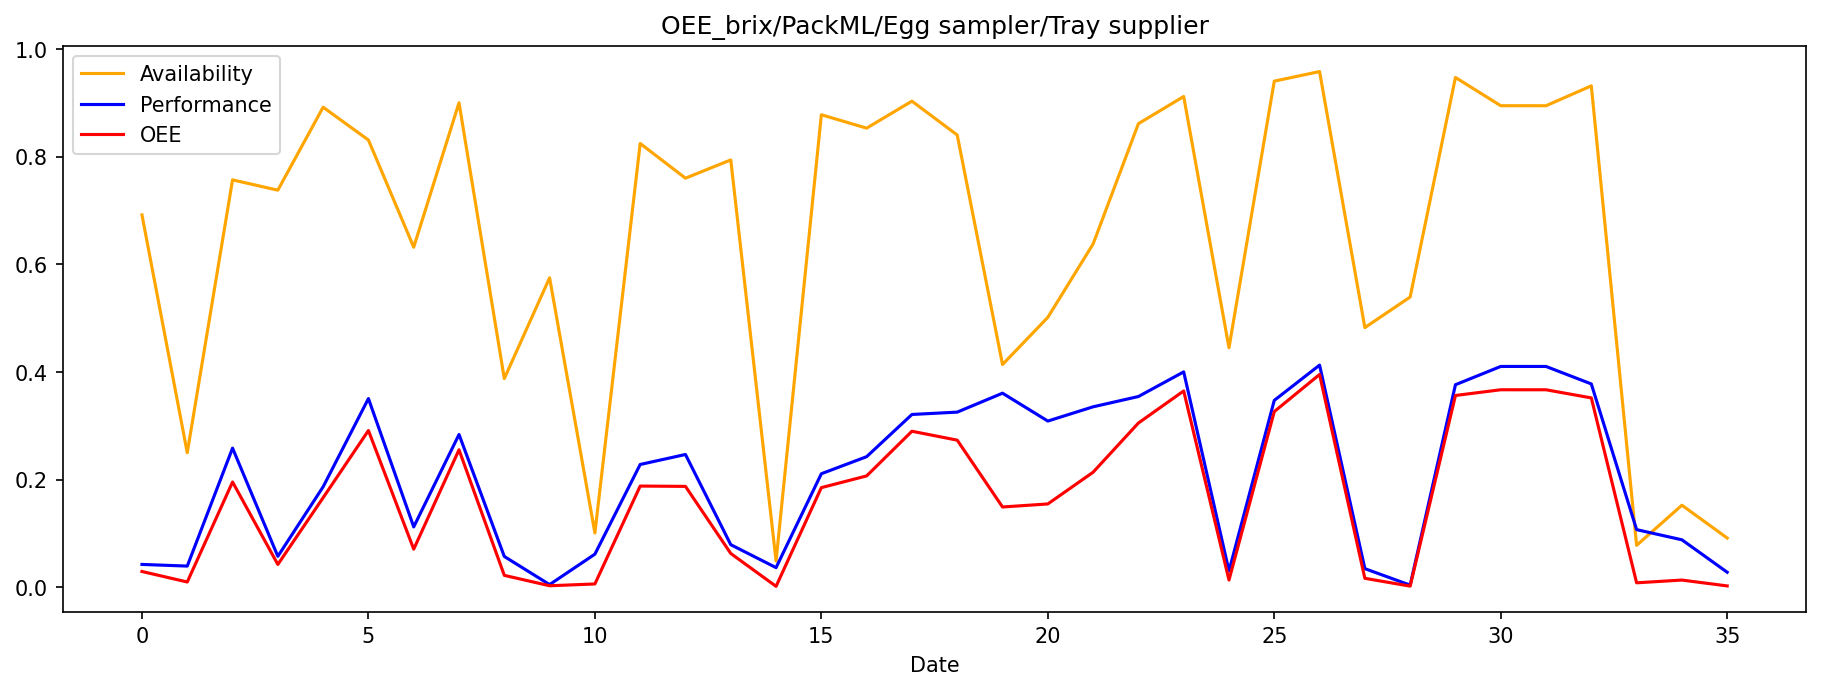

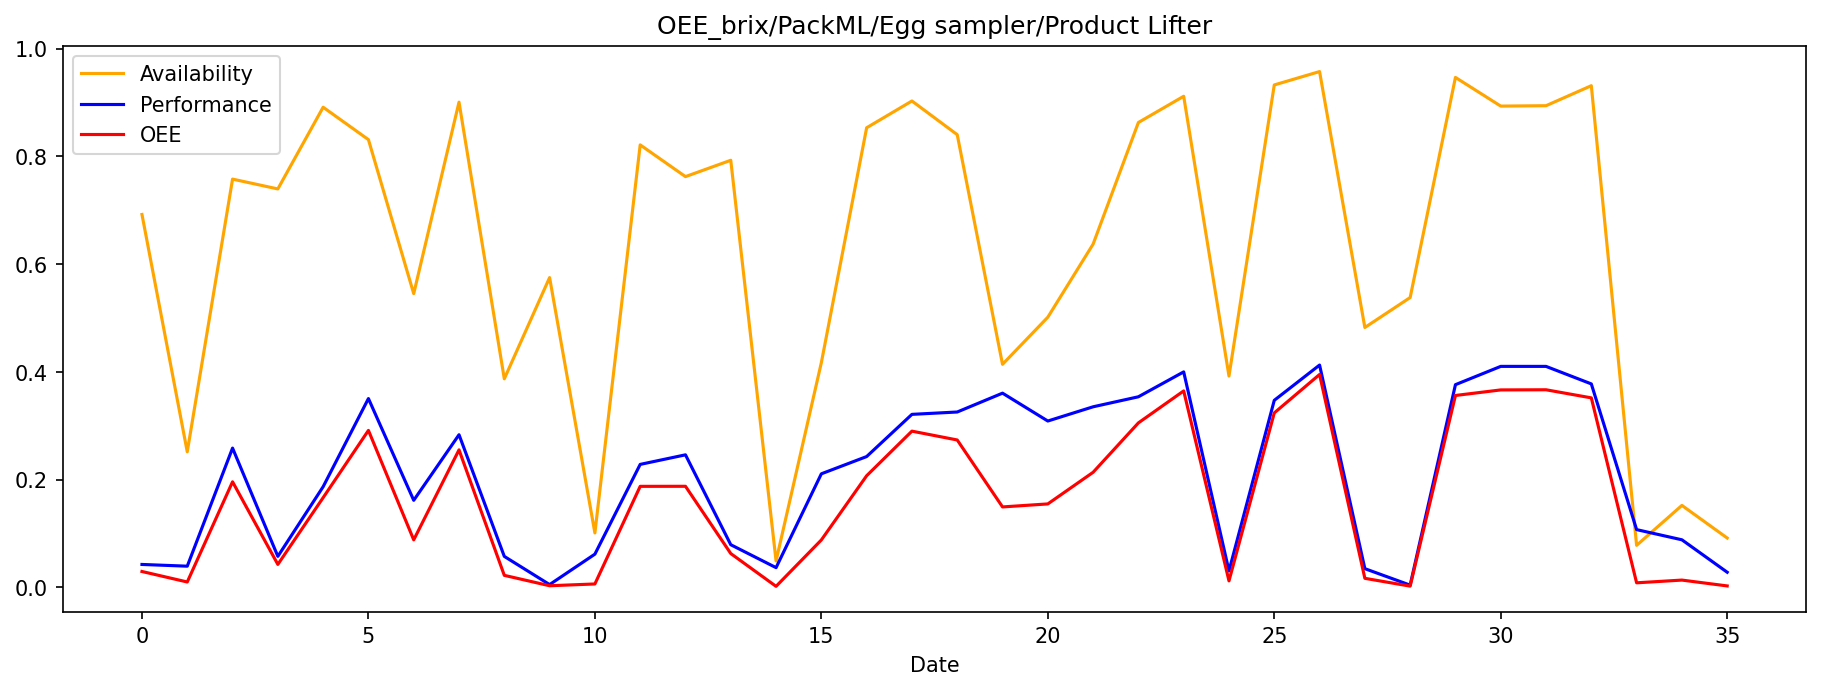

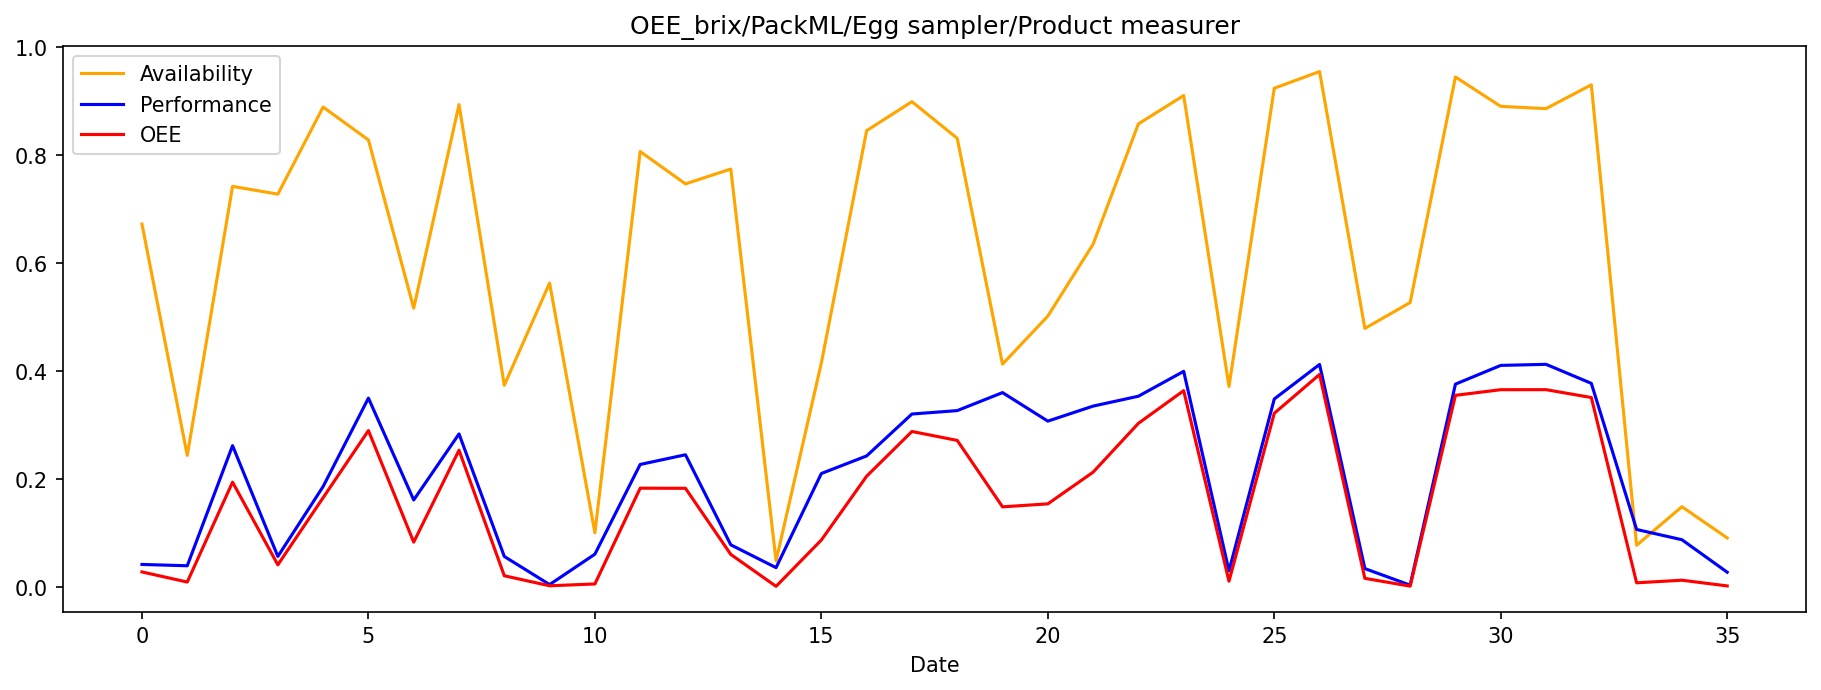

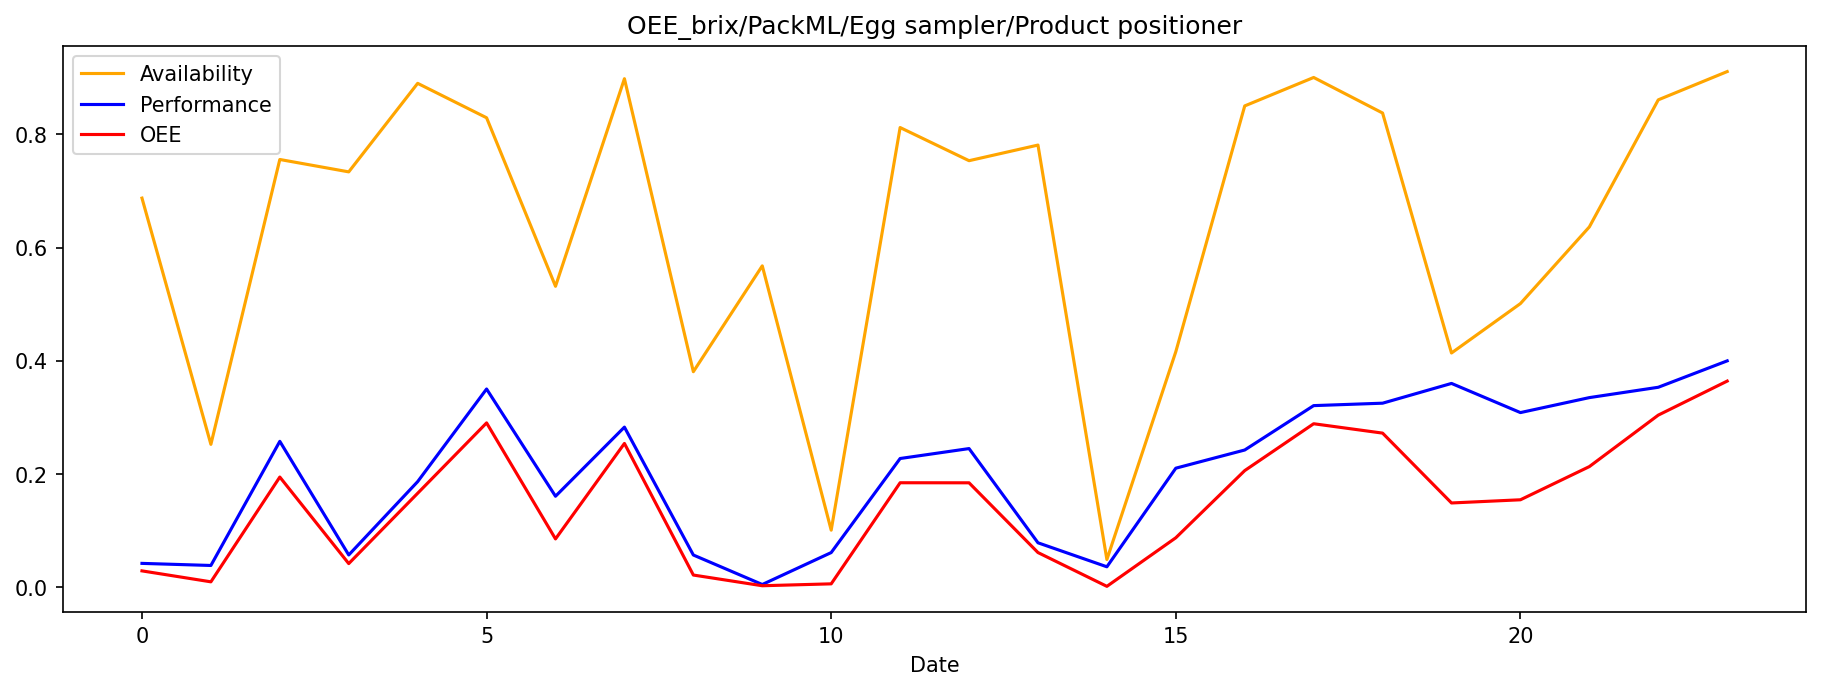

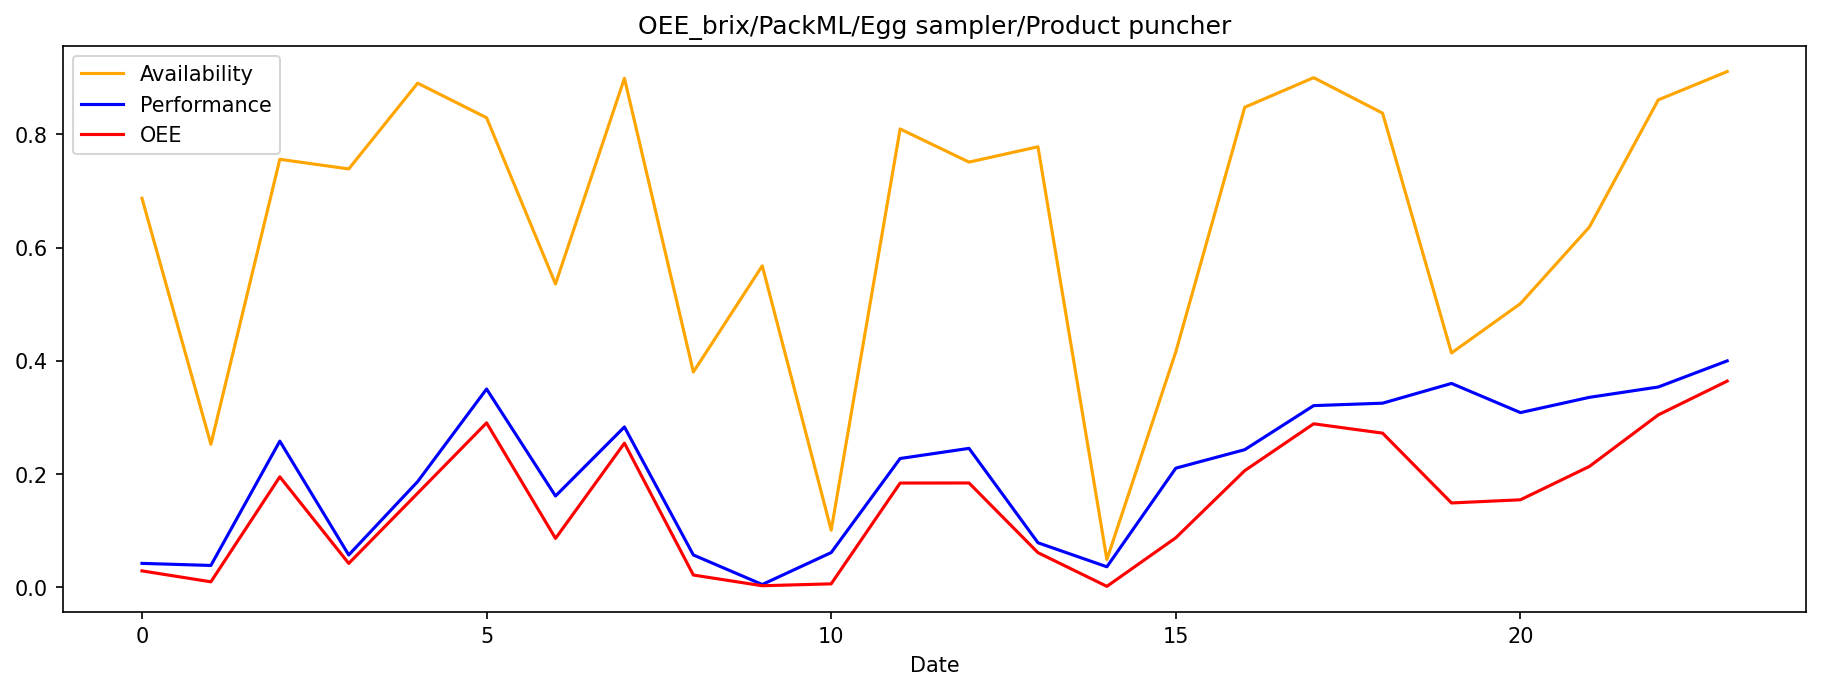

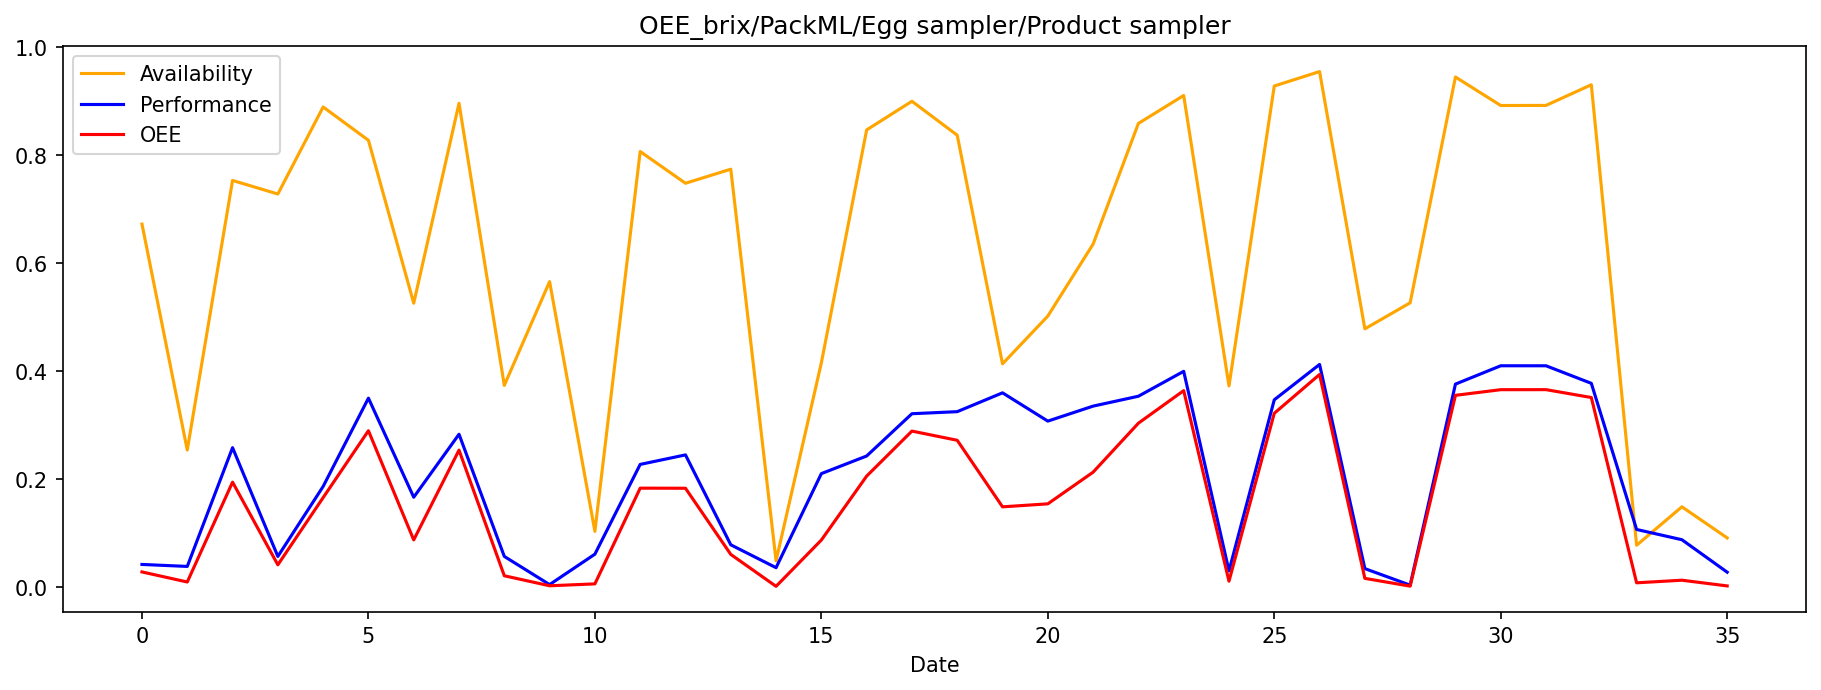

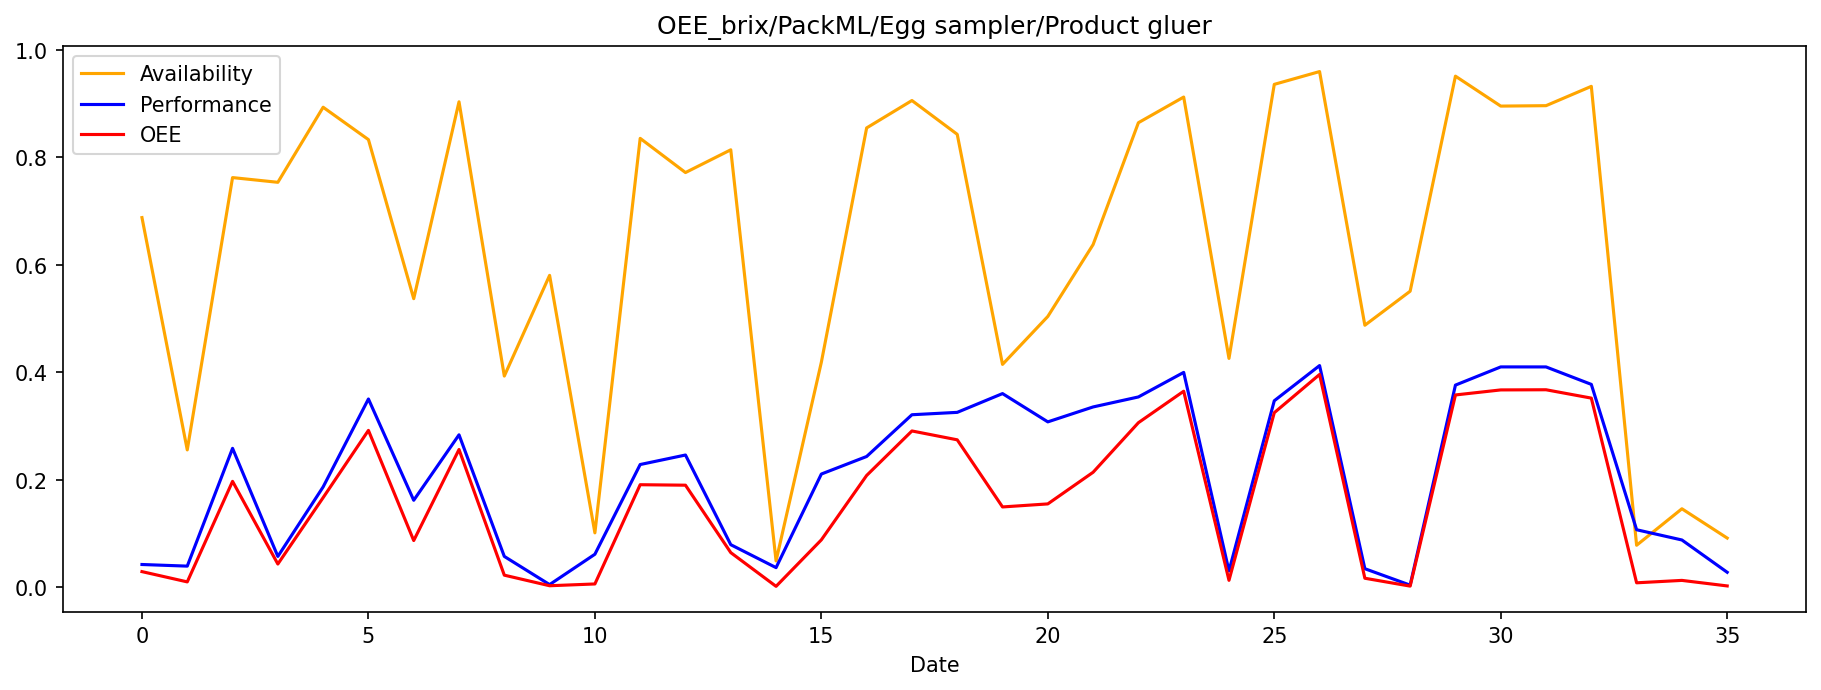

In [40]:
#for va in df['BB']:
#for OEE in dataframes_list2:
for OEE ,section in zip(dataframes_list3, df_T['BB']):

        # to set the plot size
        plt.figure(figsize=(15, 5), dpi=150)

        # using plot method to plot open prices.
        # in plot method we set the label and color of the curve.
        #Egg_sampler['Availability'].plot(label='Egg sampler')
        OEE['Availability'].plot(label='Availability', color='orange')
        OEE['Performance'].plot(label='Performance', color='blue')
        OEE['OEE'].plot(label='OEE', color='red')
        

        #ford['Open'].plot(label='Ford')

        # adding title to the plot
       # plt.title('Egg sampler OEE')
        plt.title(f"OEE_{section}")

        # adding Label to the x-axis
        plt.xlabel('Date')

        # adding legend to the curve
        plt.legend()

In [43]:
import matplotlib.ticker as mtick

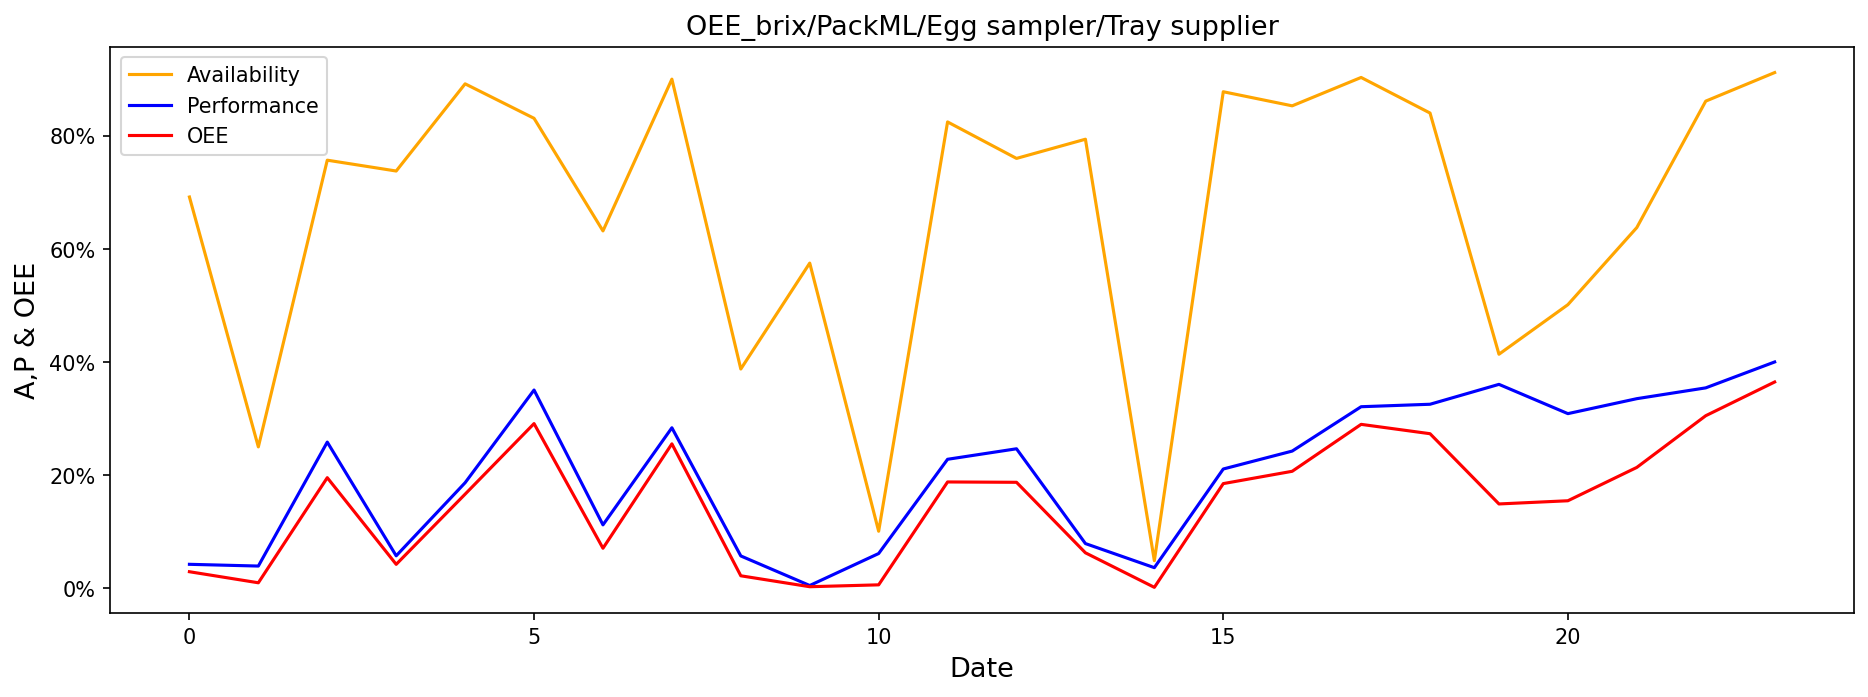

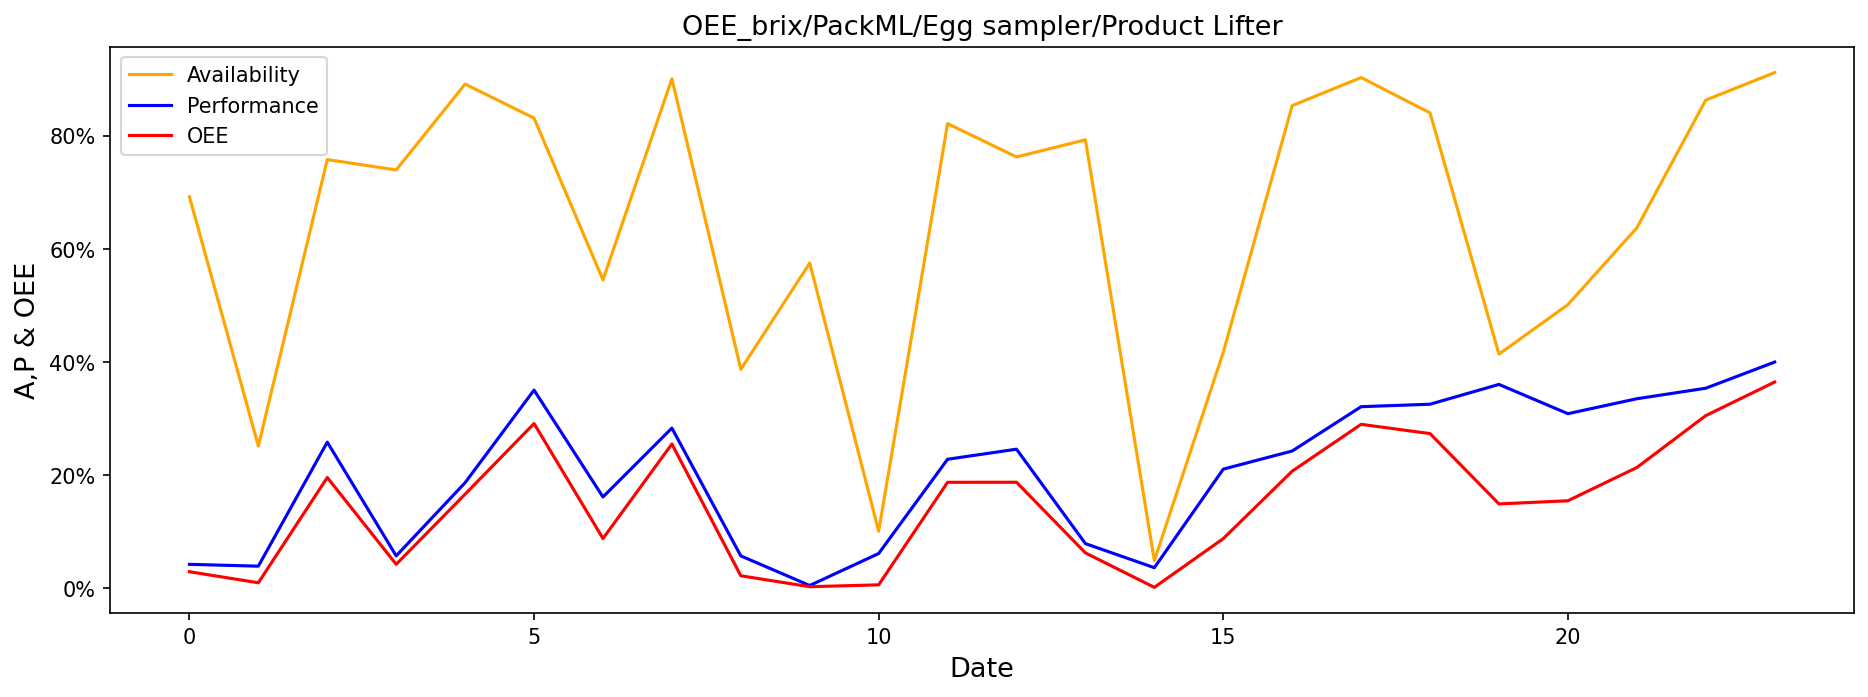

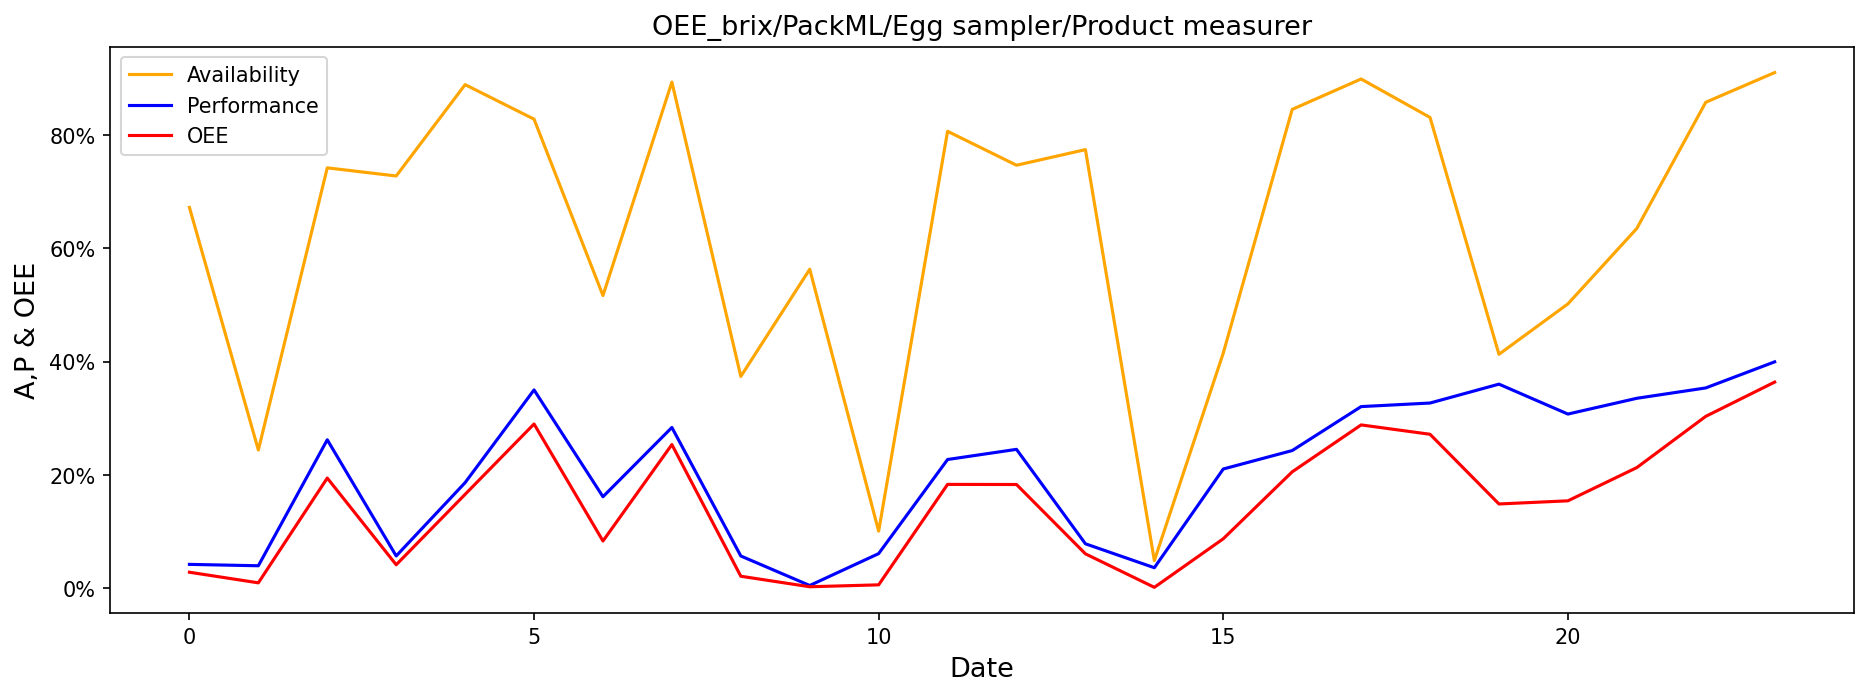

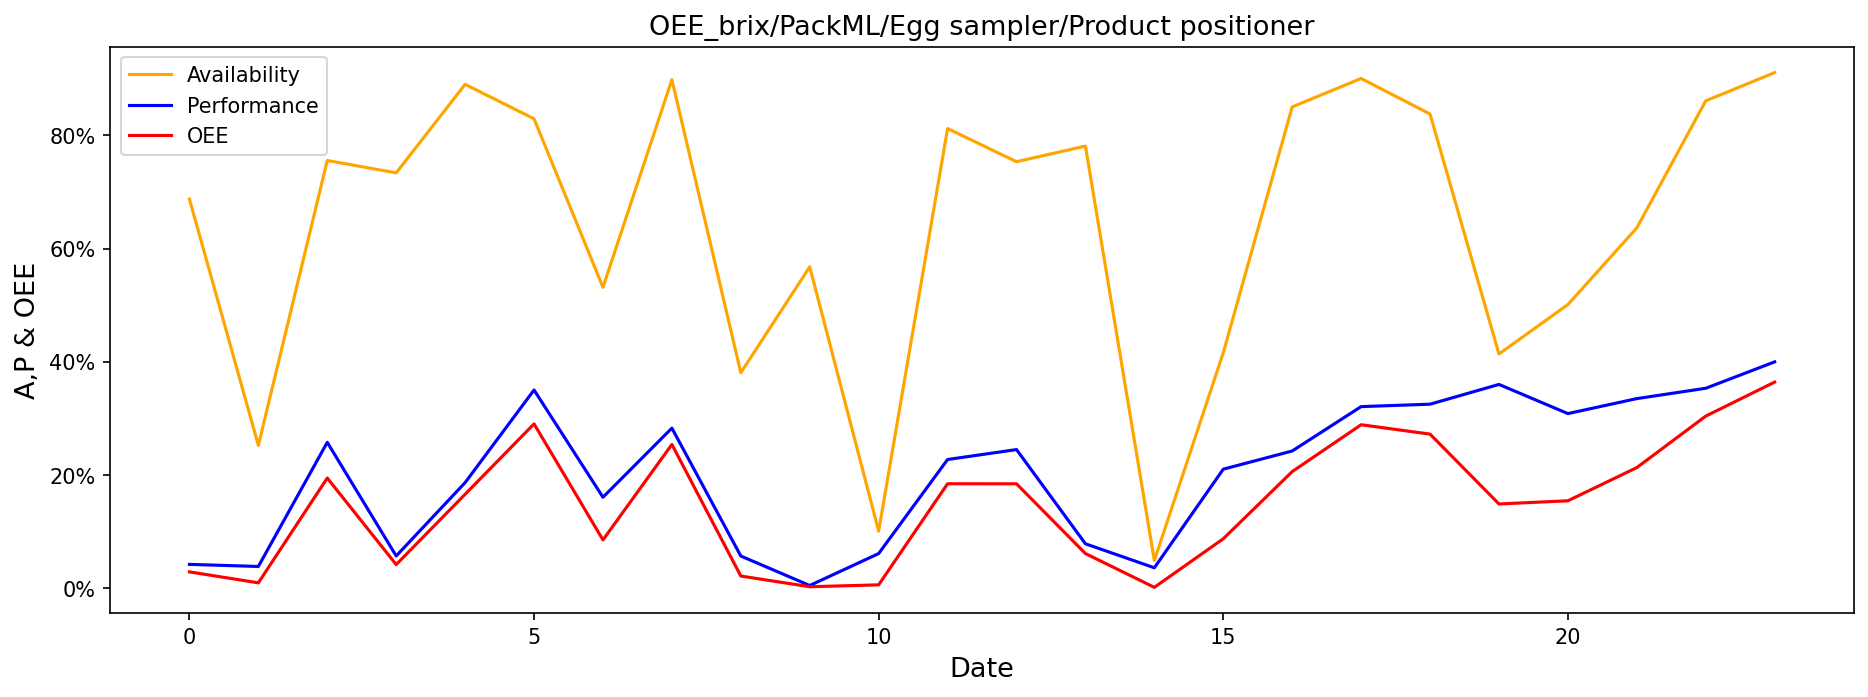

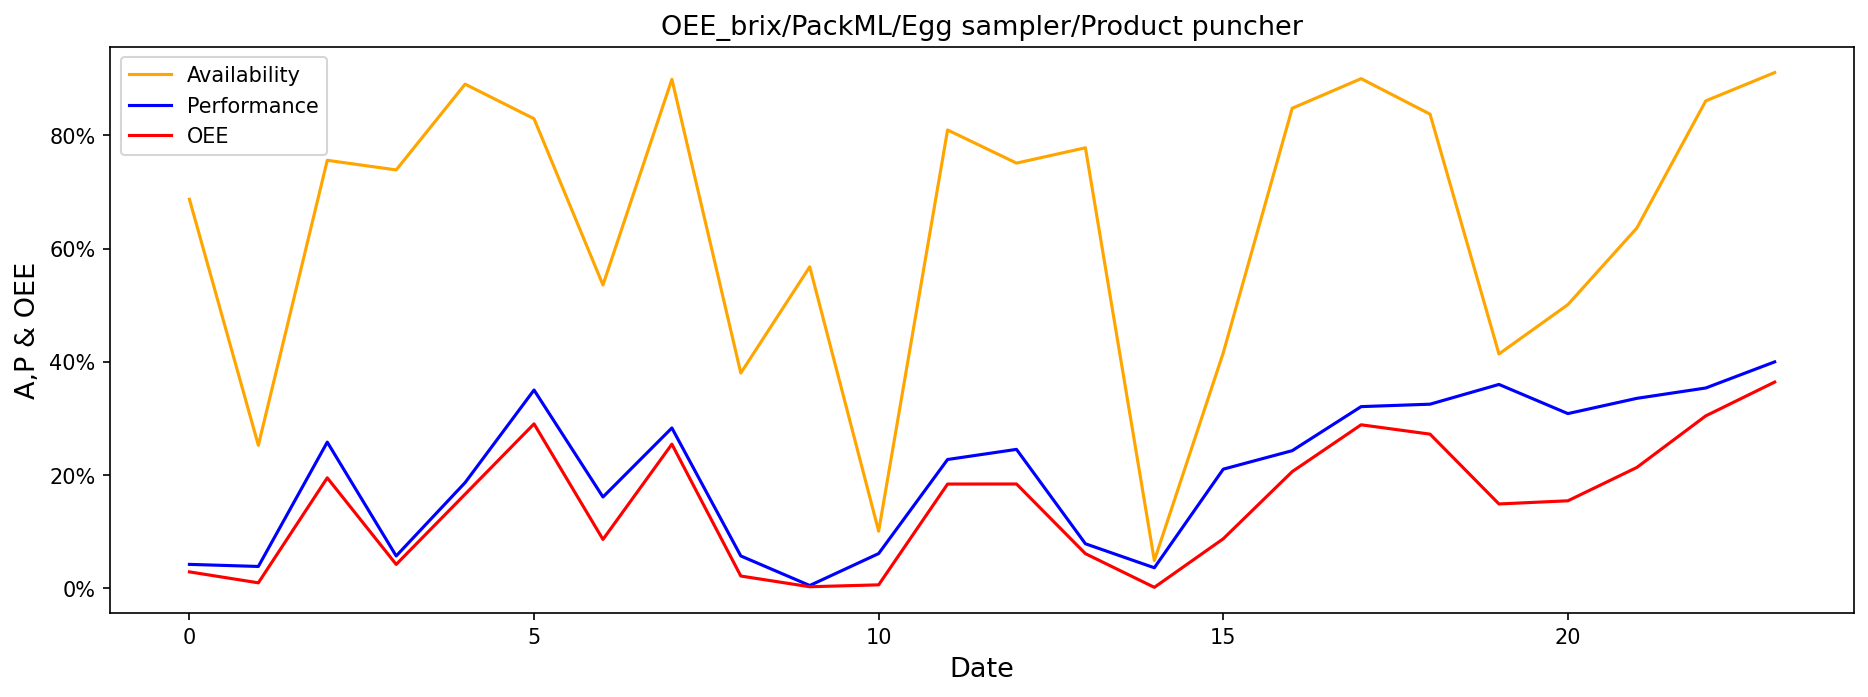

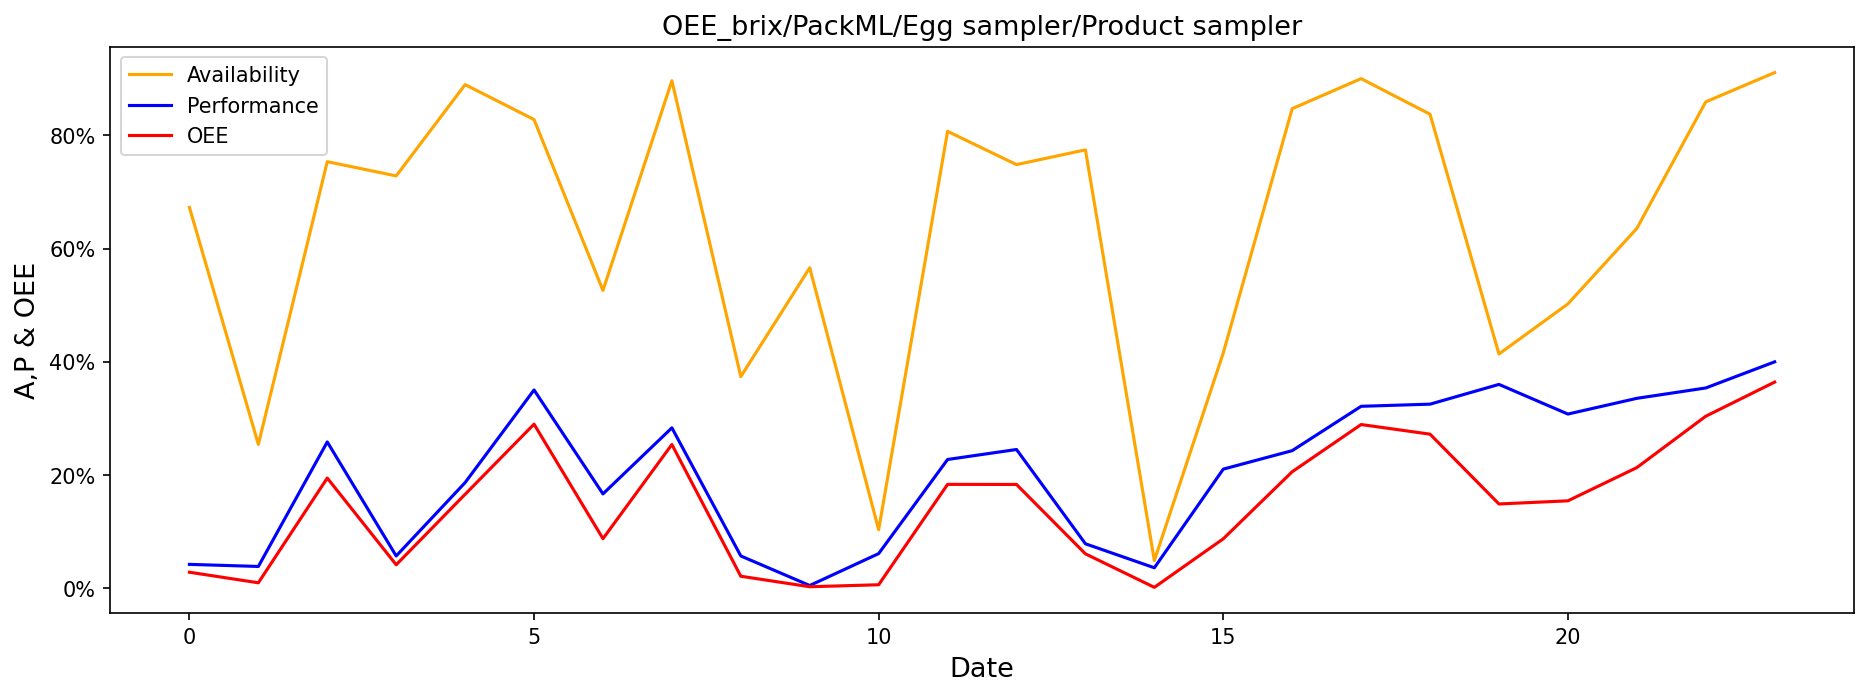

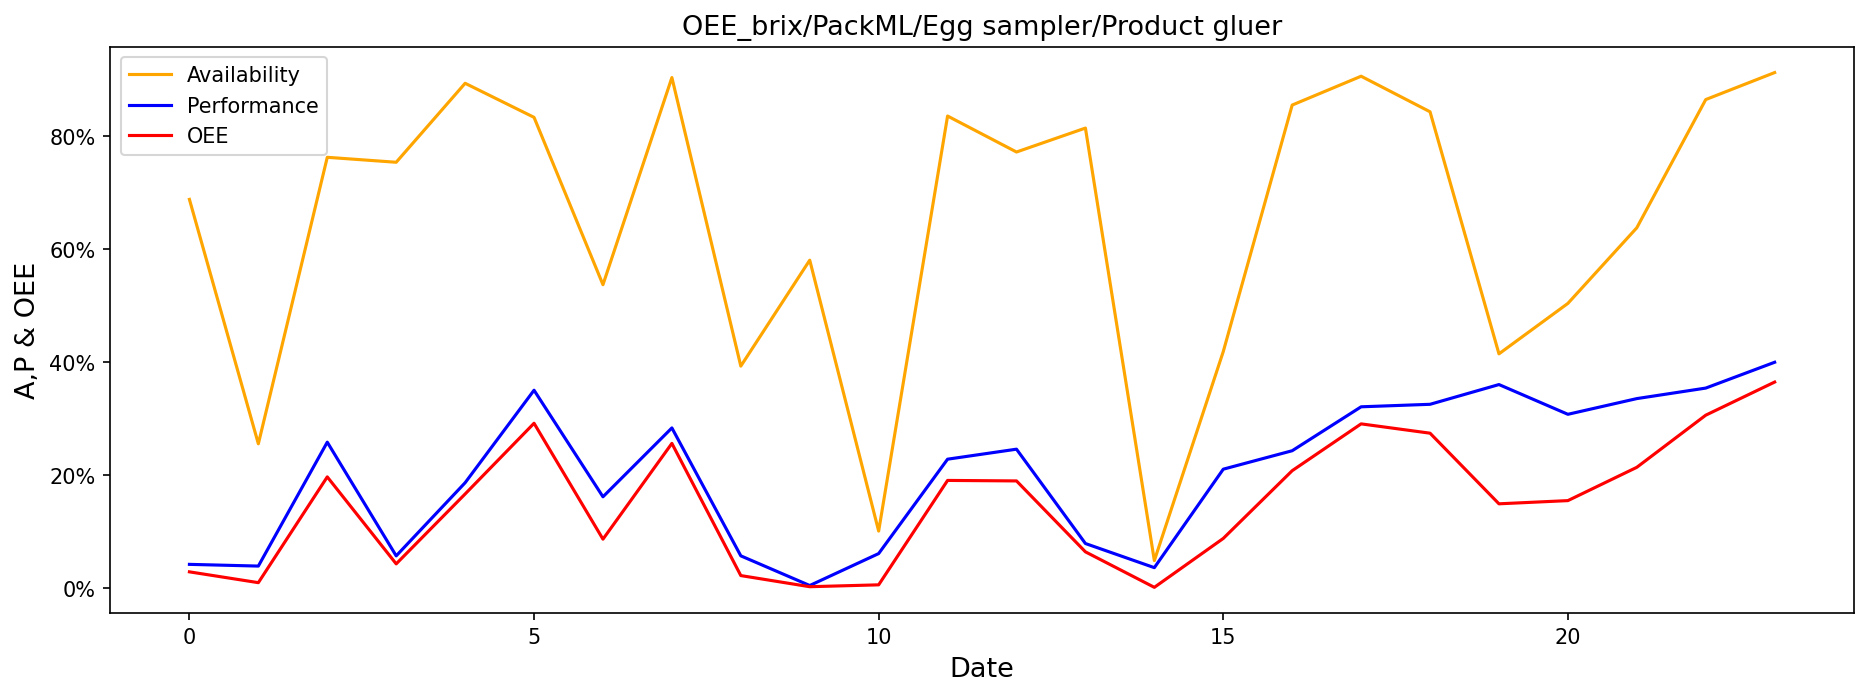

In [67]:
# 24 day data
#for va in df['BB']:
#for OEE in dataframes_list2:

for OEE ,section in zip(dataframes_list3, df_T['BB']):
        # to set the plot size
        plt.figure(figsize=(15, 5), dpi=150)

        # using plot method to plot open prices.
        # in plot method we set the label and color of the curve.
        #Egg_sampler['Availability'].plot(label='Egg sampler')
        OEE['Availability'].head(24).plot(label='Availability', color='orange')
        OEE['Performance'].head(24).plot(label='Performance', color='blue')
        OEE['OEE'].head(24).plot(label='OEE', color='red')
  
    

        #ford['Open'].plot(label='Ford')

        # adding title to the plot
       # plt.title('Egg sampler OEE')
        plt.title(f"OEE_{section}", fontsize=13)

        # adding Label to the x-axis
        plt.ylabel('A,P & OEE', fontsize=13)
        plt.xlabel('Date', fontsize=13)
        #plt.xlabel('Date')
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
        #plt.gcf().autofmt_xdate()

        # adding legend to the curve
        plt.legend()

**Results**

OEE Analysis<br>
Figures depict the OEE analysis of the machine. Every graph displays availability, performance, and OEE values for the same dates (24 days). Analyzing the figures reveals that the OEE values for each section are similar. It shows the system level OEE value for each section.<br>

Further, Figures demonstrates significant fluctuations in the availability of the machine. As the machine is still in the development stage, it requires frequent maintenance and upgrades which result in downtime. The machine operates for 16 hours a day, but the actual production time is subject to customer requirements and the need for maintenance and upgrades. This explains the considerable fluctuation in availability. Furthermore, the machine's performance is lower, with a speed of 4000 eggs per hour instead of the 7000 eggs per hour that it is capable of. Figure 28 confirms this with maximum egg production being close to 40000, and most days recording less than 40000 eggs. Taking into account the availability and performance of the machine, the OEE value is considerably lower.

Note: This machine no data available for calculating quality of the machine. As a result, this project only focuses on availability and
performance, and the OEE calculation assumes that quality is equal to one.